```Reproduce your clustering experiments, but on the data after you've run dimensionality reduction on it. Yes, that’s 16 combinations of datasets, dimensionality reduction, and clustering method. You should look at all of them, but focus on the more interesting findings in your report```

In [36]:
import pandas as pd
import numpy as np
import random as rnd
import re
import pickle

# visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

In [31]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM

from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import homogeneity_score, completeness_score,  v_measure_score

In [32]:
SEED = 1

# SEEDS = np.random.randint(0,100, size=5)
SEEDS = [0, 2,  5, 46, 57, 88]
print(SEEDS)

[0, 2, 5, 46, 57, 88]


# 1. Dataset

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from scipy import stats

# 1 Image Segmentation Dataset

In [20]:
dataset_dir = './ims_train_pca.csv'
df = pd.read_csv(dataset_dir)
df_ims_pca = df.drop(['Unnamed: 0'],axis=1)

dataset_dir = './ims_train_ica.csv'
df = pd.read_csv(dataset_dir)
df_ims_ica = df.drop(['Unnamed: 0'],axis=1)

dataset_dir = './ims_train_srp.csv'
df = pd.read_csv(dataset_dir)
df_ims_srp = df.drop(['Unnamed: 0'],axis=1)

dataset_dir = './ims_train_rf.csv'
df = pd.read_csv(dataset_dir)
df_ims_rf = df.drop(['Unnamed: 0'],axis=1)

In [21]:
dataset_dir = './aud_train_pca.csv'
df = pd.read_csv(dataset_dir)
df_aud_pca = df.drop(['Unnamed: 0'],axis=1)

dataset_dir = './aud_train_ica.csv'
df = pd.read_csv(dataset_dir)
df_aud_ica = df.drop(['Unnamed: 0'],axis=1)

dataset_dir = './aud_train_srp.csv'
df = pd.read_csv(dataset_dir)
df_aud_srp = df.drop(['Unnamed: 0'],axis=1)

dataset_dir = './aud_train_rf.csv'
df = pd.read_csv(dataset_dir)
df_aud_rf = df.drop(['Unnamed: 0'],axis=1)

# 2. KMeans

In [23]:
def kmclustering(X_scaled, seeds, k_max, k_min=2):
    km_sse = []
    km_sil = []

    k_max = 10
    for k in range(k_min, k_max+1):
        inertias = []
        sil = []
        db = []

        for seed in seeds:
            ## K-Means
            km = KMeans(n_clusters=k, random_state=seed, n_jobs=-1)
            km = km.fit(X_scaled)
            labels = km.predict(X_scaled)

            inertias.append(km.inertia_)
            silhouette = silhouette_score(X_scaled, labels, metric='euclidean')
            sil.append(silhouette)   

        ## average
        km_sse.append(np.mean(inertias))
        km_sil.append(np.mean(sil))
        
    return (km_sse, km_sil)

## 2.1 Image Segmentation Dataset

In [55]:
## image segmentation
k_max = 10
k_min = 2
x = list(range(k_min, k_max+1))

X_ims = df_ims_pca.drop(['Class'], axis=1)
wse_ims_pca, sil_ims_pca = kmclustering(X_ims, SEEDS, k_max=k_max, k_min=k_min)

X_ims = df_ims_ica.drop(['Class'], axis=1)
wse_ims_ica, sil_ims_ica = kmclustering(X_ims, SEEDS, k_max=k_max, k_min=k_min)

X_ims = df_ims_srp.drop(['Class'], axis=1)
wse_ims_srp, sil_ims_srp = kmclustering(X_ims, SEEDS, k_max=k_max, k_min=k_min)

X_ims = df_ims_ica.drop(['Class'], axis=1)
wse_ims_rf, sil_ims_rf = kmclustering(X_ims, SEEDS, k_max=k_max, k_min=k_min)

Text(0.5, 0, 'n_classes')

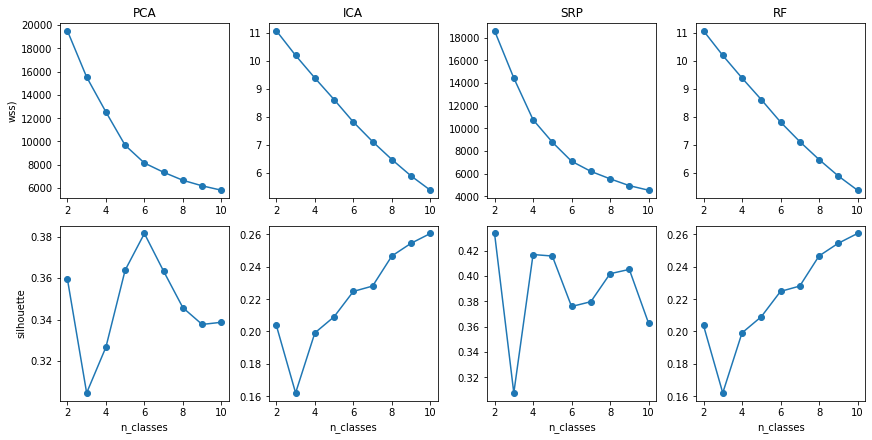

In [56]:
fig = plt.figure(figsize=(12, 6),constrained_layout=True)
gs = gridspec.GridSpec(2, 4, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(x, wse_ims_pca, 'o-')
ax1.set_ylabel('wss)')
ax1.set_title('PCA')
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(x, sil_ims_pca, 'o-')
ax2.set_xlabel('n_classes')
ax2.set_ylabel('silhouette')


ax3 = fig.add_subplot(gs[0, 1])
ax3.plot(x, wse_ims_ica, 'o-')
ax3.set_title('ICA')
ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(x, sil_ims_ica, 'o-')
ax4.set_xlabel('n_classes')

ax5 = fig.add_subplot(gs[0, 2])
ax5.plot(x, wse_ims_srp, 'o-')
ax5.set_title('SRP')
ax6 = fig.add_subplot(gs[1, 2])
ax6.plot(x, sil_ims_srp, 'o-')
ax6.set_xlabel('n_classes')

ax7 = fig.add_subplot(gs[0, 3])
ax7.plot(x, wse_ims_rf, 'o-')
ax7.set_title('RF')
ax8 = fig.add_subplot(gs[1, 3])
ax8.plot(x, sil_ims_rf, 'o-')
ax8.set_xlabel('n_classes')


## 2.2 Audit Dataset

In [53]:
## audit
k_max = 10
k_min = 2
x = list(range(k_min, k_max+1))

X_aud = df_aud_pca.drop(['Risk'], axis=1)
wse_aud_pca, sil_aud_pca = kmclustering(X_aud, SEEDS, k_max=k_max, k_min=k_min)

X_aud = df_aud_ica.drop(['Class'], axis=1)
wse_aud_ica, sil_aud_ica = kmclustering(X_aud, SEEDS, k_max=k_max, k_min=k_min)

X_aud = df_aud_srp.drop(['Class'], axis=1)
wse_aud_srp, sil_aud_srp = kmclustering(X_aud, SEEDS, k_max=k_max, k_min=k_min)

X_aud = df_aud_ica.drop(['Class'], axis=1)
wse_aud_rf, sil_aud_rf = kmclustering(X_aud, SEEDS, k_max=k_max, k_min=k_min)

Text(0.5, 0, 'n_classes')

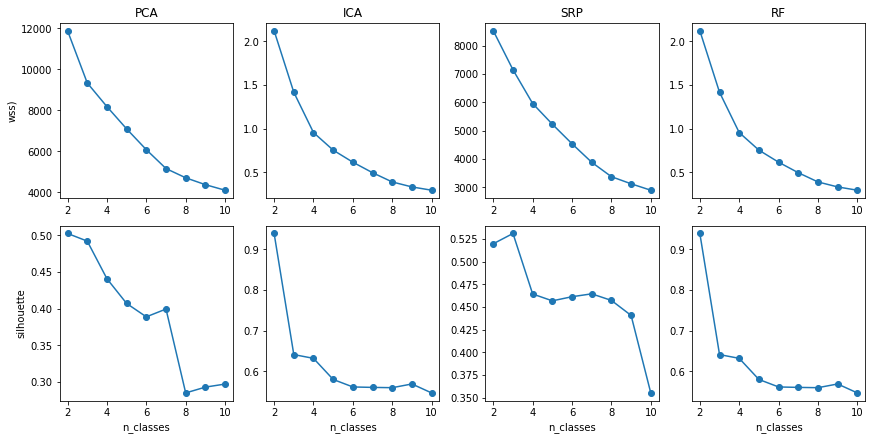

In [57]:
fig = plt.figure(figsize=(12, 6),constrained_layout=True)
gs = gridspec.GridSpec(2, 4, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(x, wse_aud_pca, 'o-')
ax1.set_ylabel('wss)')
ax1.set_title('PCA')
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(x, sil_aud_pca, 'o-')
ax2.set_xlabel('n_classes')
ax2.set_ylabel('silhouette')

ax3 = fig.add_subplot(gs[0, 1])
ax3.plot(x, wse_aud_ica, 'o-')
ax3.set_title('ICA')
ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(x, sil_aud_ica, 'o-')
ax4.set_xlabel('n_classes')

ax5 = fig.add_subplot(gs[0, 2])
ax5.plot(x, wse_aud_srp, 'o-')
ax5.set_title('SRP')
ax6 = fig.add_subplot(gs[1, 2])
ax6.plot(x, sil_aud_srp, 'o-')
ax6.set_xlabel('n_classes')

ax7 = fig.add_subplot(gs[0, 3])
ax7.plot(x, wse_aud_rf, 'o-')
ax7.set_title('RF')
ax8 = fig.add_subplot(gs[1, 3])
ax8.plot(x, sil_aud_rf, 'o-')
ax8.set_xlabel('n_classes')


# 3. EM

In [59]:
def gmm_clusting(X_scaled, seeds, k_max, k_min=2):
    gmm_score = []
    gmm_bic = []

    for k in range(k_min, k_max+1):  
        gs = []
        bic = []
        for seed in seeds:
            ## EM GaussianMixture
            gmm = GMM(n_components=k, random_state=seed, n_init=10, max_iter=1000)
            gmm = gmm.fit(X_scaled)

            gs.append(gmm.score(X_scaled))
            bic.append(gmm.bic(X_scaled))        

        ## average
        gmm_score.append(np.mean(gs))
        gmm_bic.append(np.mean(bic))
        
    return (gmm_score, gmm_bic)

## 2.1 Image Segmentation Dataset

In [60]:
## image segmentation
k_max = 16
k_min = 2
x = list(range(k_min, k_max+1))


X_ims = df_ims_pca.drop(['Class'], axis=1)
score_ims_pca, bic_ims_pca = gmm_clusting(X_ims, SEEDS, k_max=k_max, k_min=k_min)

X_ims = df_ims_ica.drop(['Class'], axis=1)
score_ims_ica, bic_ims_ica = gmm_clusting(X_ims, SEEDS, k_max=k_max, k_min=k_min)

X_ims = df_ims_srp.drop(['Class'], axis=1)
score_ims_srp, bic_ims_srp = gmm_clusting(X_ims, SEEDS, k_max=k_max, k_min=k_min)

X_ims = df_ims_ica.drop(['Class'], axis=1)
score_ims_rf, bic_ims_rf = gmm_clusting(X_ims, SEEDS, k_max=k_max, k_min=k_min)

Text(0.5, 0, 'n_classes')

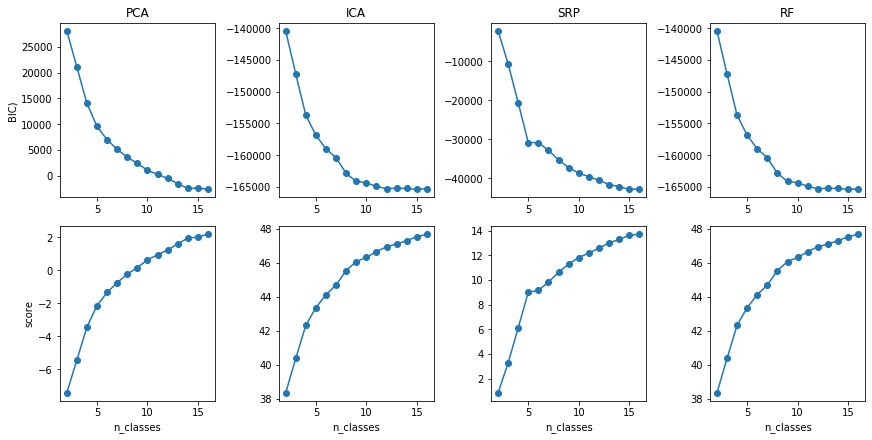

In [63]:
fig = plt.figure(figsize=(12, 6),constrained_layout=True)
gs = gridspec.GridSpec(2, 4, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
# y = [np.log(-y) for y in bic_ims_pca]
y = bic_ims_pca
ax1.plot(x, y, 'o-')
ax1.set_ylabel('BIC)')
ax1.set_title('PCA')
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(x, score_ims_pca, 'o-')
ax2.set_xlabel('n_classes')
ax2.set_ylabel('score')


ax3 = fig.add_subplot(gs[0, 1])
# y = [np.log(-y) for y in bic_ims_ica]
y = bic_ims_ica
ax3.plot(x, y, 'o-')
ax3.set_title('ICA')
ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(x, score_ims_ica, 'o-')
ax4.set_xlabel('n_classes')

ax5 = fig.add_subplot(gs[0, 2])
# y = [np.log(-y) for y in bic_ims_srp]
y = bic_ims_srp
ax5.plot(x, y, 'o-')
ax5.set_title('SRP')
ax6 = fig.add_subplot(gs[1, 2])
ax6.plot(x, score_ims_srp, 'o-')
ax6.set_xlabel('n_classes')

ax7 = fig.add_subplot(gs[0, 3])
# y = [np.log(-y) for y in bic_ims_rf]
y = bic_ims_rf
ax7.plot(x, y, 'o-')
ax7.set_title('RF')
ax8 = fig.add_subplot(gs[1, 3])
ax8.plot(x, score_ims_rf, 'o-')
ax8.set_xlabel('n_classes')

## 2.2 Audit Dataset

In [65]:
## audit
k_max = 16
k_min = 2
x = list(range(k_min, k_max+1))


X_aud = df_aud_pca.drop(['Risk'], axis=1)
score_aud_pca, bic_aud_pca = gmm_clusting(X_aud, SEEDS, k_max=k_max, k_min=k_min)

X_aud = df_aud_ica.drop(['Class'], axis=1)
score_aud_ica, bic_aud_ica = gmm_clusting(X_aud, SEEDS, k_max=k_max, k_min=k_min)

X_aud = df_aud_srp.drop(['Class'], axis=1)
score_aud_srp, bic_aud_srp = gmm_clusting(X_aud, SEEDS, k_max=k_max, k_min=k_min)

X_aud = df_aud_ica.drop(['Class'], axis=1)
score_aud_rf, bic_aud_rf = gmm_clusting(X_aud, SEEDS, k_max=k_max, k_min=k_min)

Text(0.5, 0, 'n_classes')

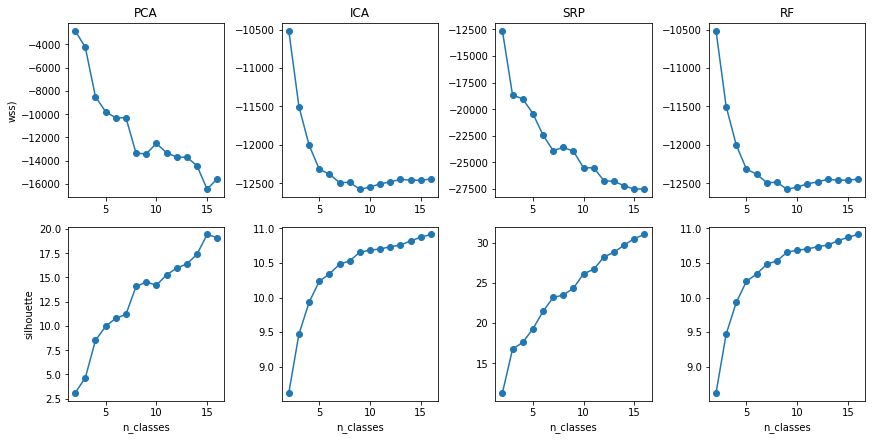

In [66]:
fig = plt.figure(figsize=(12, 6),constrained_layout=True)
gs = gridspec.GridSpec(2, 4, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
# y = [np.log(-y) for y in bic_aud_pca]
y = bic_aud_pca
ax1.plot(x, y, 'o-')
ax1.set_ylabel('wss)')
ax1.set_title('PCA')
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(x, score_aud_pca, 'o-')
ax2.set_xlabel('n_classes')
ax2.set_ylabel('silhouette')


ax3 = fig.add_subplot(gs[0, 1])
# y = [np.log(-y) for y in bic_aud_ica]
y = bic_aud_ica
ax3.plot(x, y, 'o-')
ax3.set_title('ICA')
ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(x, score_aud_ica, 'o-')
ax4.set_xlabel('n_classes')

ax5 = fig.add_subplot(gs[0, 2])
# y = [np.log(-y) for y in bic_aud_srp]
y = bic_aud_srp
ax5.plot(x, y, 'o-')
ax5.set_title('SRP')
ax6 = fig.add_subplot(gs[1, 2])
ax6.plot(x, score_aud_srp, 'o-')
ax6.set_xlabel('n_classes')

ax7 = fig.add_subplot(gs[0, 3])
# y = [np.log(-y) for y in bic_aud_rf]
y = bic_aud_rf
ax7.plot(x, y, 'o-')
ax7.set_title('RF')
ax8 = fig.add_subplot(gs[1, 3])
ax8.plot(x, score_aud_rf, 'o-')
ax8.set_xlabel('n_classes')